In [78]:
# load in the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# load in the data in use
data = pd.read_csv(filepath_or_buffer= "~/Desktop/datasets/vending_machine_sales.csv")
data.shape

(9617, 18)

In [80]:
# I am going to try to figure out the unique values of each variables (besides NAs)
# pick out the columns with only one unique value and remove those (since there's no variability within that variable)

initial_list= []
for col in data.columns:
    print(data[col].dropna().unique())
    if (len(data[col].dropna().unique())==1) :
        initial_list.append(col)
    
initial_list # list seems to be empty, there is no column that contains only one-value


['Processed' 'Unlinked']
['VJ300320611' 'VJ300205292' 'VJ300320686' 'VJ300320609' 'VJ300320692']
['Brunswick Sq Mall' 'Earle Asphalt' 'GuttenPlans' 'EB Public Library']
['BSQ Mall x1366 - ATT' 'BSQ Mall x1364 - Zales' 'Earle Asphalt x1371'
 'GuttenPlans x1367' 'EB Public Library x1380']
['Red Bull - Energy Drink - Sugar Free' 'Takis - Hot Chilli Pepper & Lime'
 'Bai Antioxidant - Brasilia BB'
 "Miss Vickie's Potato Chip - Sea Salt & Vinega"
 "Miss Vickie's Potato Chip - Lime & Cracked Pe" 'Monster Energy Original'
 'Seapoint Farms Dry Roasted Edamame - Wasabi' 'Snapple Diet Tea - Lemon'
 'Skinny Pop Popcorn' 'Stretch Island Fruit Leathers Snacks - Variet'
 'KitKat - Crisp Wafers' 'Wonderful Pistachios - Variety'
 'Spindrift - Sparkling Water  Lime'
 "Miss Vickie's Potato Chip - Sea Salt Original"
 'Jacks Links Bar Beef Strip' 'Vitamin Water - XXX Acai BB Pomegranate'
 'Cheetos - Fleming Hot Crunchy'
 'Pure Organic Fruit Bar - Strawberry Banana' 'Oreo Mini'
 'Nutter Butter Bites' 'Jack 

[]

In [81]:
# manually cleaning the data and removing the columns that are not useful based on domain knowledge

# 1. want to filter out 'unlinked' status transactions
# since we're only interested in processed transactions
data = data[data['Status'] == 'Processed']

# now we can remove the status , we can also remove device ID because 
# it represents the same info as the column 'Machine'
# also wanna remove 'Transaction' because it is a reference number, not interested in a particular transaction
# for our purposes, we're trying to get the info of the retail items sales rather than the particular transaction
# so we're removing all transaction related identifier 
# removing RCoil, MCoil since it is not within our purposes
remove_cols=['Status', 'Device ID', 'Transaction', 'RCoil', 'MCoil', 'MQty', 'MPrice','TransTotal']
data= data.drop(columns=remove_cols)


In [82]:
data.shape
data.head()

,Location,Machine,Product,Category,TransDate,Type,RPrice,RQty,LineTotal,Prcd Date
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,1/1/2022,Credit,3.5,1,3.5,1/1/2022
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,1/1/2022,Credit,3.5,1,3.5,1/1/2022
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,1/1/2022,Credit,1.5,1,1.5,1/1/2022
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,1/1/2022,Credit,1.5,1,1.5,1/1/2022
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,1/1/2022,Credit,3.5,1,3.5,1/1/2022


In [83]:
# first task we're interested in - quantities sold and sales total of each category

def calculated_total_sales(group):
    total_profit=(group['RQty']*group['RPrice']).sum()
    return pd.Series({'total_profit' : total_profit})

result2=data.groupby(by='Category').apply(calculated_total_sales).reset_index()

/var/folders/l6/5kk7td194hj6cy130spmgcfr0000gn/T/ipykernel_18255/3769536987.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result2=data.groupby(by='Category').apply(calculated_total_sales).reset_index()


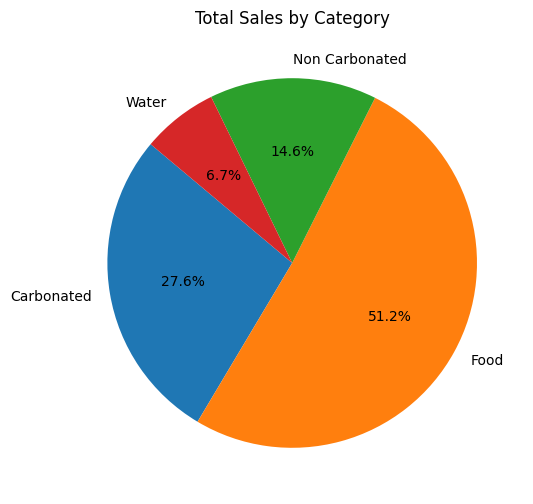

In [84]:
plt.figure(figsize=(8, 6))
plt.pie(result2['total_profit'], labels=result2['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Category')
plt.show()


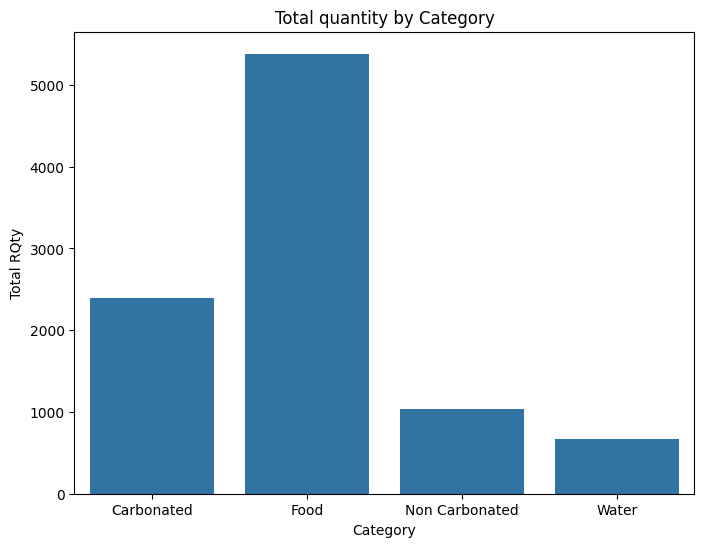

In [85]:
result1 = data.groupby(by='Category').agg({'RQty': 'sum'}).reset_index()
result1
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='RQty', data=result1)
plt.title('Total quantity by Category')
plt.xlabel('Category')
plt.ylabel('Total RQty')
plt.show()

# based on the graph above and below, food is the number1 category in both sales quantity and total sales
# carbonated beverage takes up the second place.

/var/folders/l6/5kk7td194hj6cy130spmgcfr0000gn/T/ipykernel_18255/3733759331.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  type_sales=data.groupby('Type').apply(calculated_total_sales).reset_index()


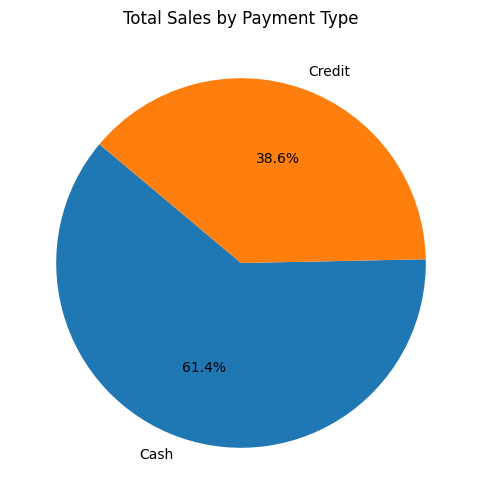

In [93]:
# next, going to analyze credit vs. cash, sales total by sector
type_sales=data.groupby('Type').apply(calculated_total_sales).reset_index()
plt.figure(figsize=(8, 6))
plt.pie(type_sales['total_profit'], labels=type_sales['Type'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Payment Type')
plt.show()

# based on the graph below, cash sales takes up 61% of the total sales
# whereas credit sales takes up 39% of the total sales

In [99]:
# now let's find out the total quantities of each product item
# and list the top 5 in descending order

product_qty=data.groupby('Product').agg({'RQty':'sum'}).reset_index()
product_qty=product_qty.sort_values(ascending=False, by='RQty').head(n=5)

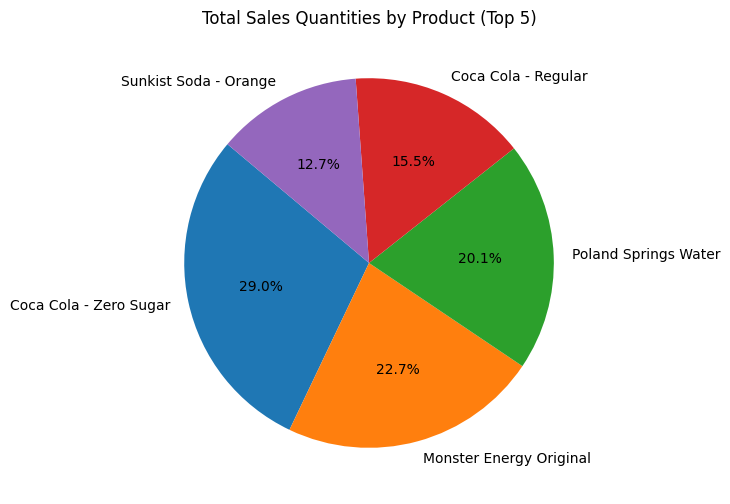

In [100]:
# plot the above calculations in pie chart
plt.figure(figsize=(8, 6))
plt.pie(product_qty['RQty'], labels=product_qty['Product'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Quantities by Product (Top 5)')
plt.show()

# top 3 are: coca cola, zero sugar; 
# monster energy original; 
# poland springs water


In [102]:
# lastly, let's find out about the total sales of each product
product_sales=data.groupby('Product').apply(calculated_total_sales).reset_index()
product_sales=product_sales.sort_values(ascending=False, by = 'total_profit').head(5)


/var/folders/l6/5kk7td194hj6cy130spmgcfr0000gn/T/ipykernel_18255/1945076453.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_sales=data.groupby('Product').apply(calculated_total_sales).reset_index()


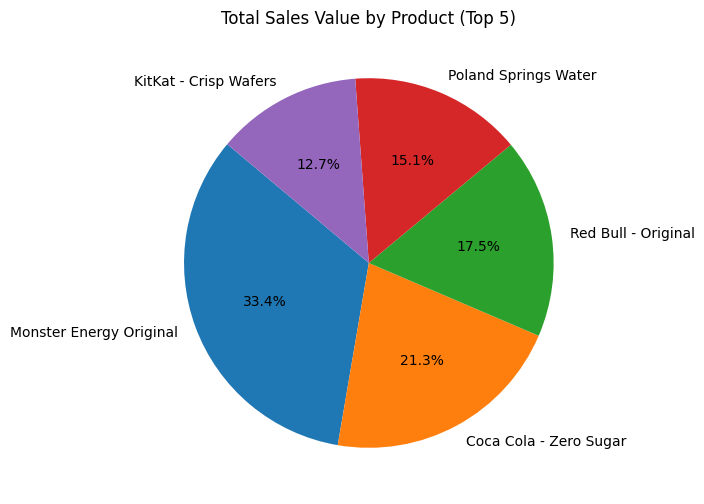

In [104]:
plt.figure(figsize=(8, 6))
plt.pie(product_sales['total_profit'], labels=product_sales['Product'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Value by Product (Top 5)')
plt.show()

# top 3 are: monster energy original; 
# coca cola zero sugar; 
# redbull original

In [ ]:
# interestingly enough, taking price into account, monster energy tops the chart; and redbull hits #3 place
# when it didn't make it to the top 5 list of the quantity rank.
# and sunkist soda orange and coke regular did not make it to the sales value top 5 list;
# kitkat and redbull ranked #5 and #3 with above average price and quantity sold.